In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

## EDA

In [7]:
df.isnull().sum() #checking how many missing data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

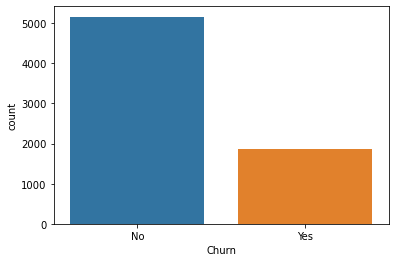

In [8]:
sns.countplot(data=df, x='Churn')# data is inbalance but nothing crazy

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

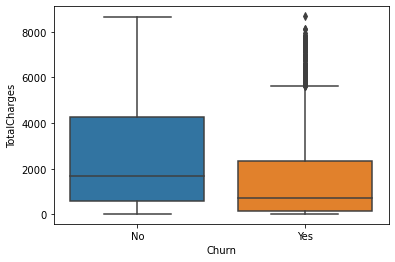

In [9]:
sns.boxplot(data=df,x='Churn',y='TotalCharges')

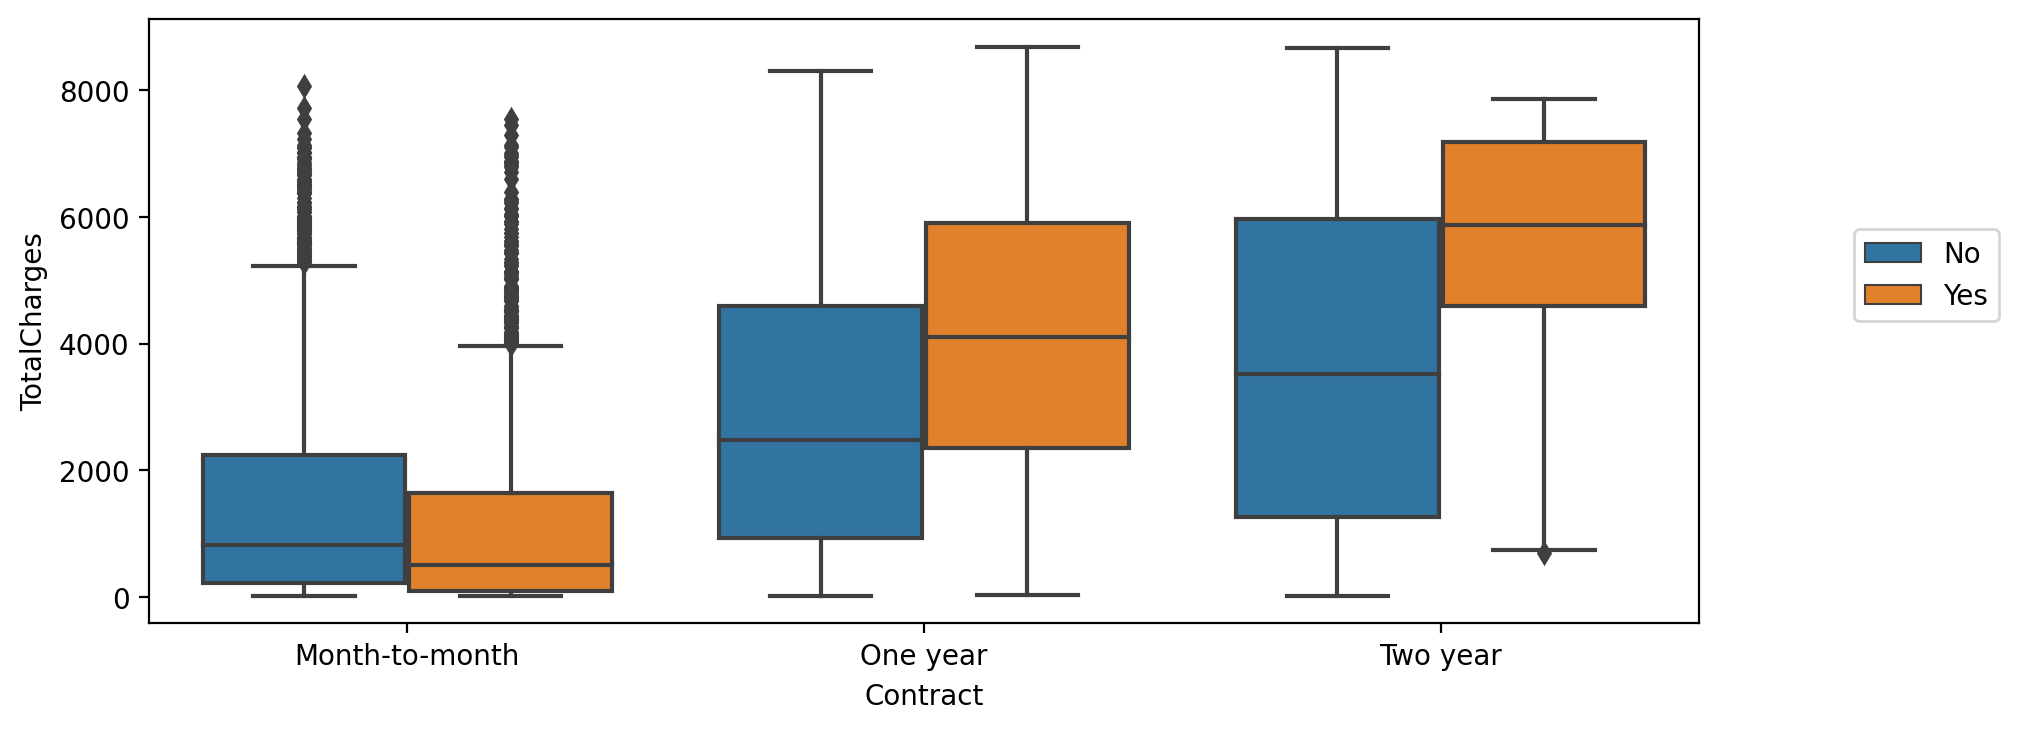

In [10]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

#### we see that for one year and two year contract people tend to churn when they a higher total charges.
* we can do some kind of discount after the contract. This would be a better solution for the long run rather trying to get the money after the contract ends, as you would only get little profit from this

In [11]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

SeniorCitizen  gender_Female  gender_Male  Partner_No  Partner_Yes  \
0                 0              1            0           0            1   
1                 0              0            1           1            0   
2                 0              0            1           1            0   
3                 0              0            1           1            0   
4                 0              1            0           1            0   
...             ...            ...          ...         ...          ...   
7027              0              0            1           0            1   
7028              0              1            0           0            1   
7029              0              1            0           0            1   
7030              1              0            1           0            1   
7031              0              0            1           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                 1               0                1                 0   
1                 1               0                0                 1   
2                 1               0                0                 1   
3                 1               0                1                 0   
4                 1               0                0                 1   
...             ...             ...              ...               ...   
7027              0               1                0                 1   
7028              0               1                0                 1   
7029              0               1                1                 0   
7030              1               0                0                 1   
7031              1               0                0                 1   

      MultipleLines_No  ...  Contract_One year  Contract_Two year  \
0                    0  ...                  0                  0   
1                    1  ...                  1                  0   
2                    1  ...                  0                  0   
3                    0  ...                  1                  0   
4                    1  ...                  0                  0   
...                ...  ...                ...                ...   
7027                 0  ...                  1                  0   
7028                 0  ...                  1                  0   
7029                 0  ...                  0                  0   
7030                 0  ...                  0                  0   
7031                 1  ...                  0                  1   

      PaperlessBilling_No  PaperlessBilling_Yes  \
0                       0                     1   
1                       1                     0   
2                       0                     1   
3                       1                     0   
4                       0                     1   
...                   ...                   ...   
7027                    0                     1   
7028                    0                     1   
7029                    0                     1   
7030                    0                     1   
7031                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7027                                        0   
7028                                        0   
7029                                        0   
7030                                        0   
7031                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1              

In [12]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [13]:
corr_yes_churn=corr_df['Churn_Yes'].sort_values().iloc[1:-1] #remove churn yes and no

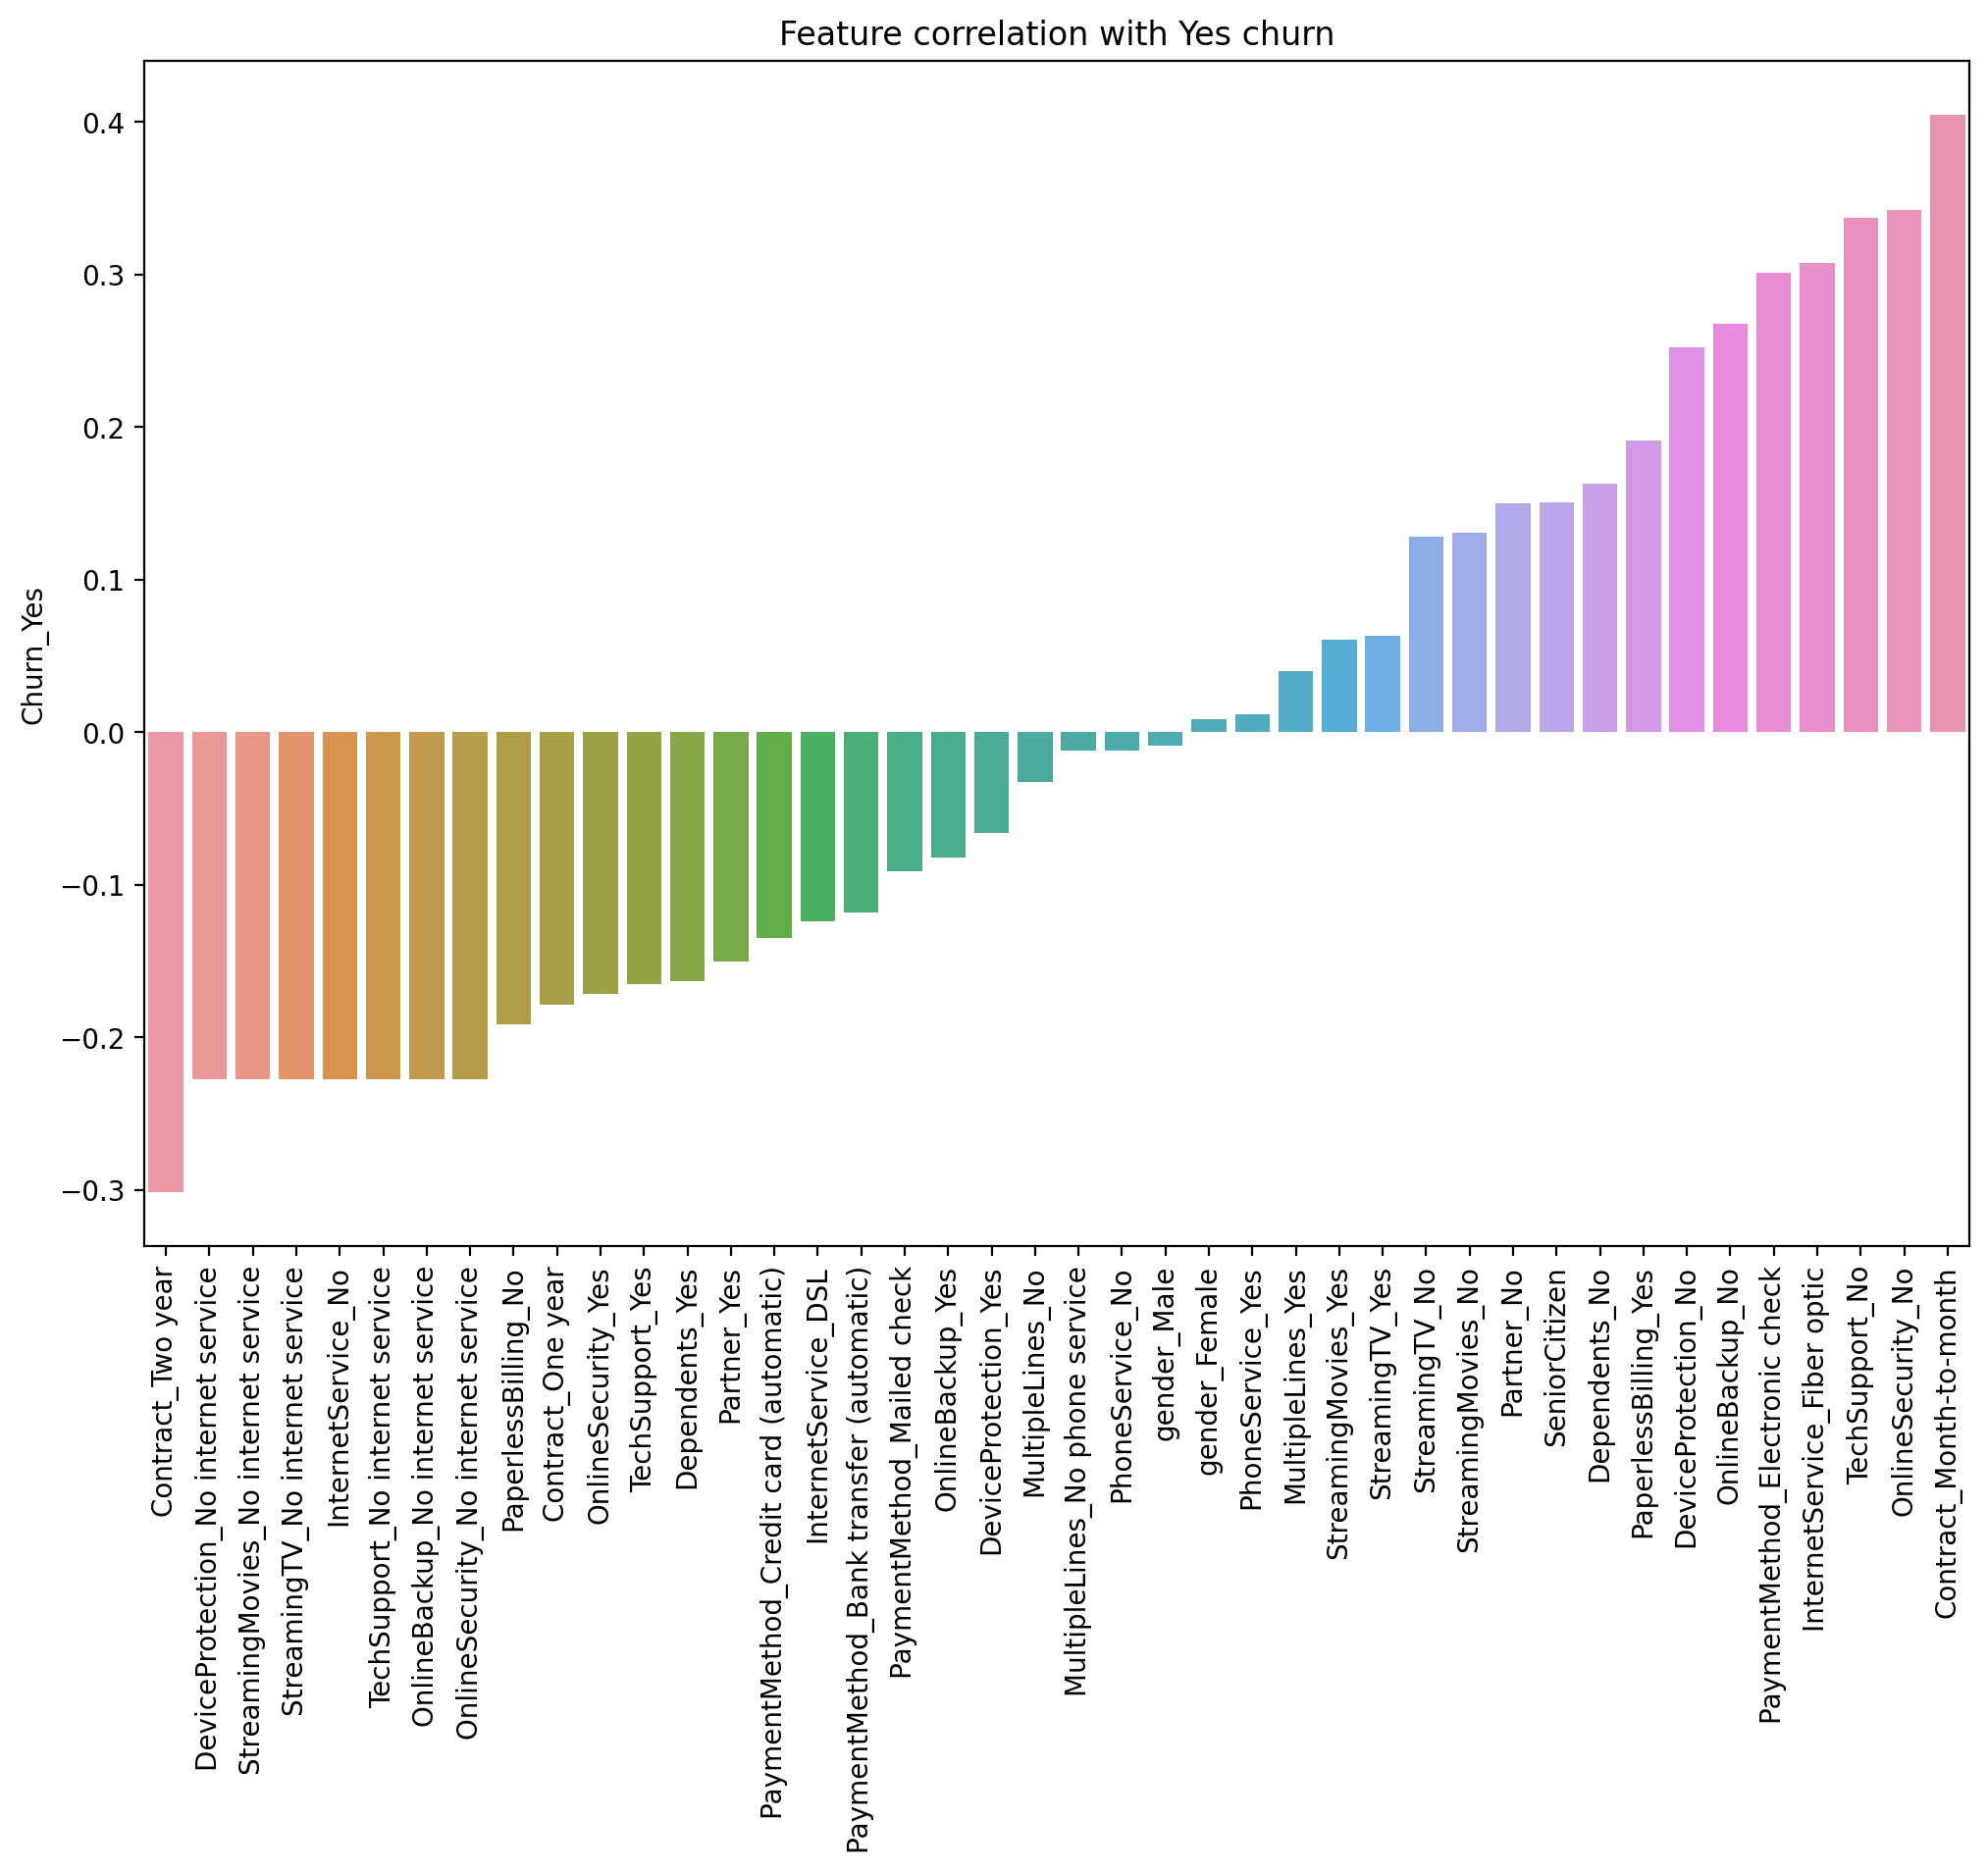

In [14]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn)
plt.title('Feature correlation with Yes churn')
plt.xticks(rotation=90);

#### we see month to month has most churn as that makes sence since people who are not on a contract dont plan on staying for long

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

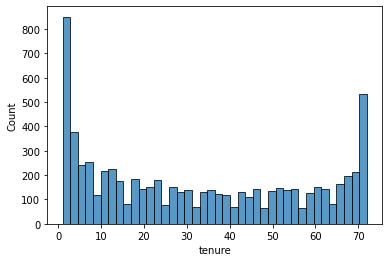

In [16]:
sns.histplot(data=df,x='tenure',bins=40)

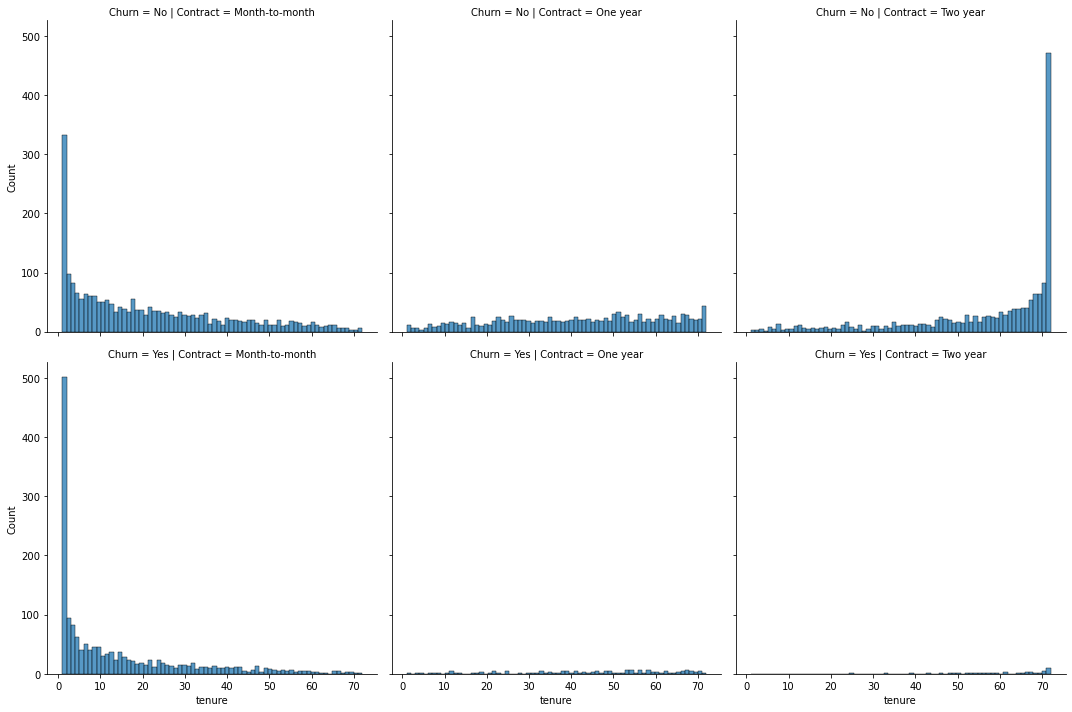

In [17]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

#### we should not worry about  one and two year contract since the distribution show people dont tend to churn those times.
#### for people that are on month to month for a while we know they tend to churn more as the total charges increased. we can offer them one or two year contract with a reduce price to stay longer


# scatter plot of total chargers vs monthly chargers, and color hue by churn.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

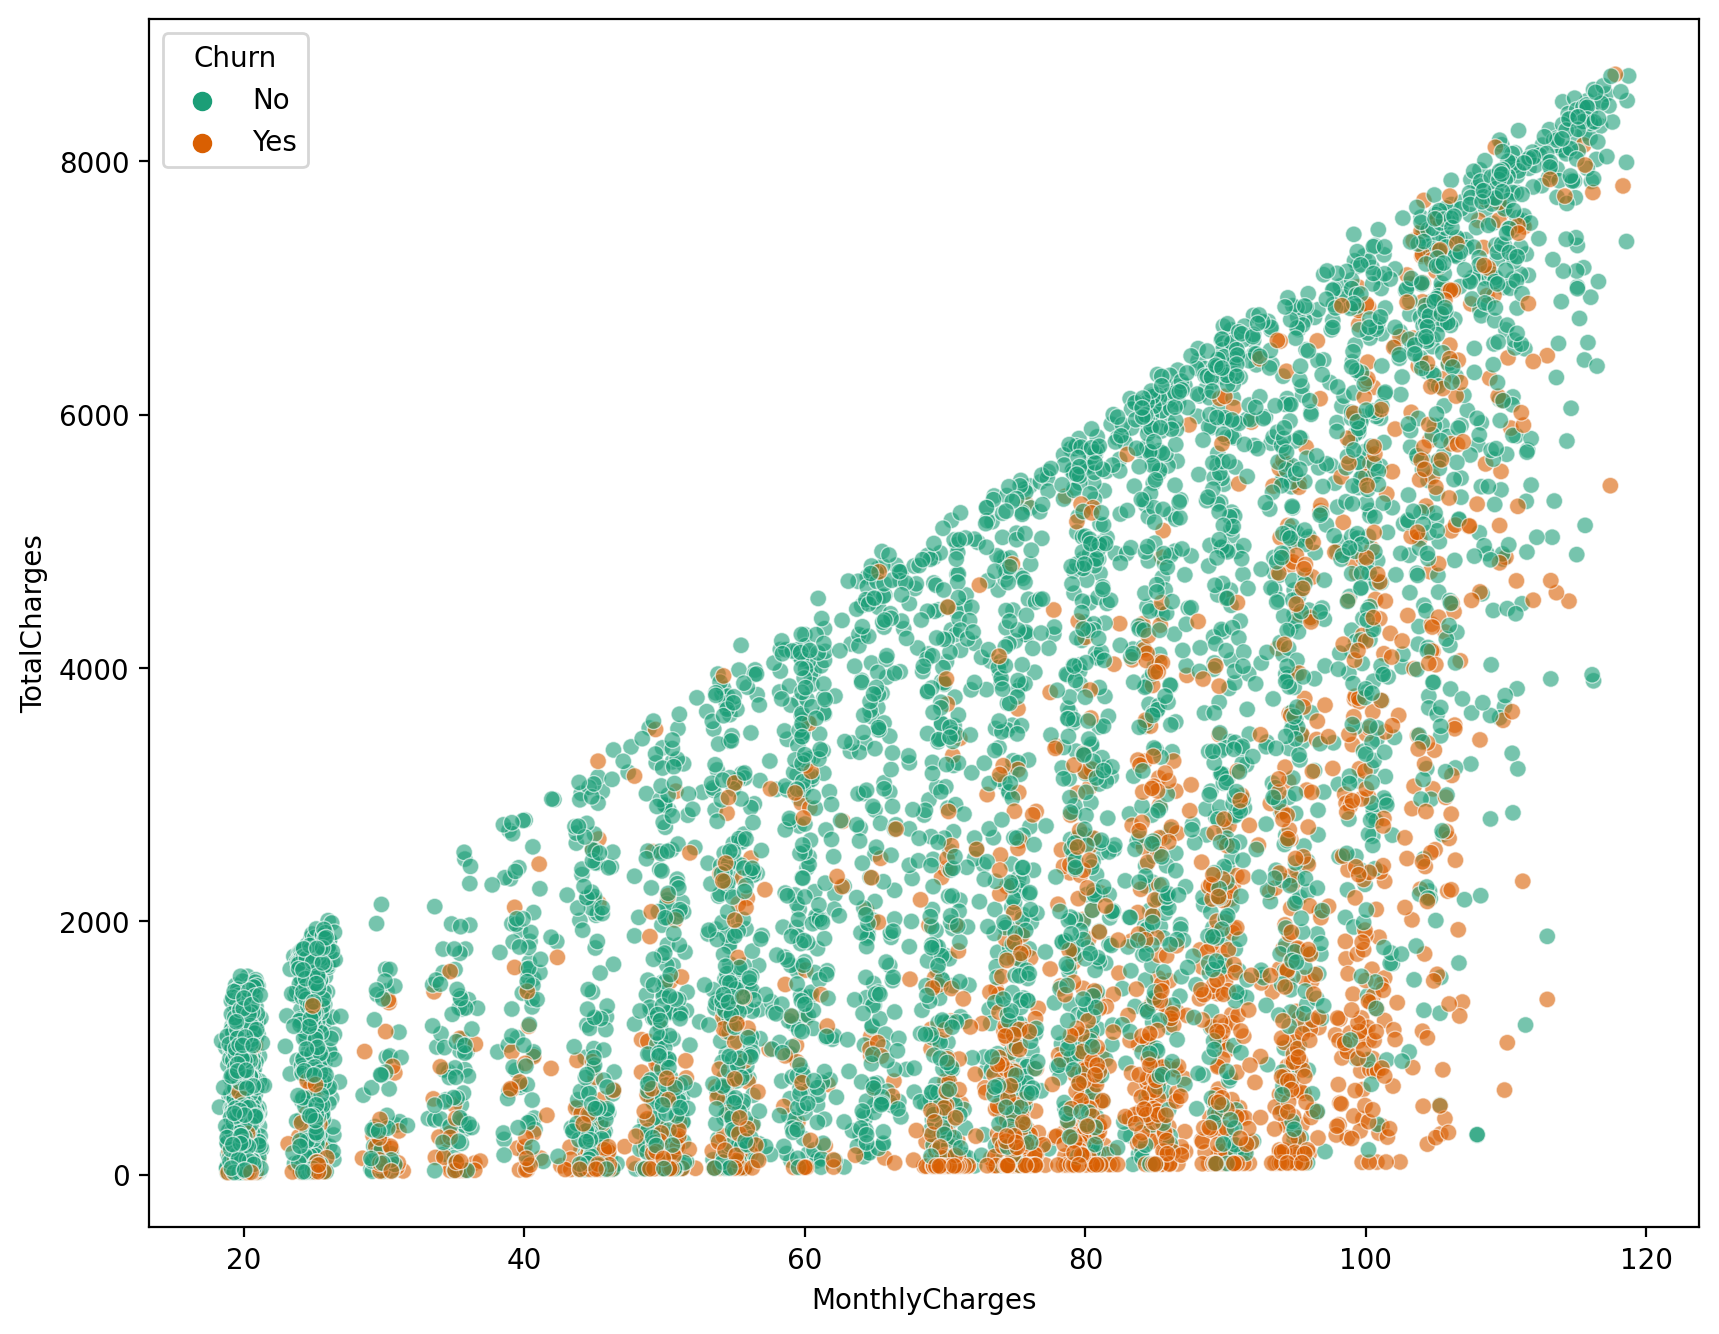

In [18]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.6,palette='Dark2')

## creating cohort based on Tenure

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [19]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [20]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [21]:
churn_rate = 100*yes_churn/ (no_churn+yes_churn)

<AxesSubplot:xlabel='tenure'>

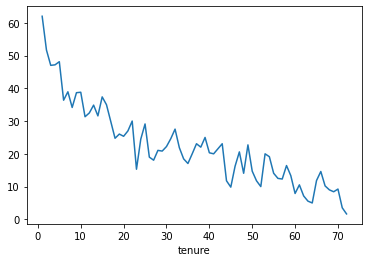

In [22]:
churn_rate.transpose()['customerID'].plot()

## Broader cohort Groups

In [23]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 months'
    elif tenure < 25:
        return '12-24 months'
    elif tenure < 49:
        return '24-48'
    else:
        return 'over 48 months'

In [24]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

In [25]:
df[['Tenure Cohort','tenure']]

Tenure Cohort  tenure
0        0-12 months       1
1              24-48      34
2        0-12 months       2
3              24-48      45
4        0-12 months       2
...              ...     ...
7027    12-24 months      24
7028  over 48 months      72
7029     0-12 months      11
7030     0-12 months       4
7031  over 48 months      66

[7032 rows x 2 columns]

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

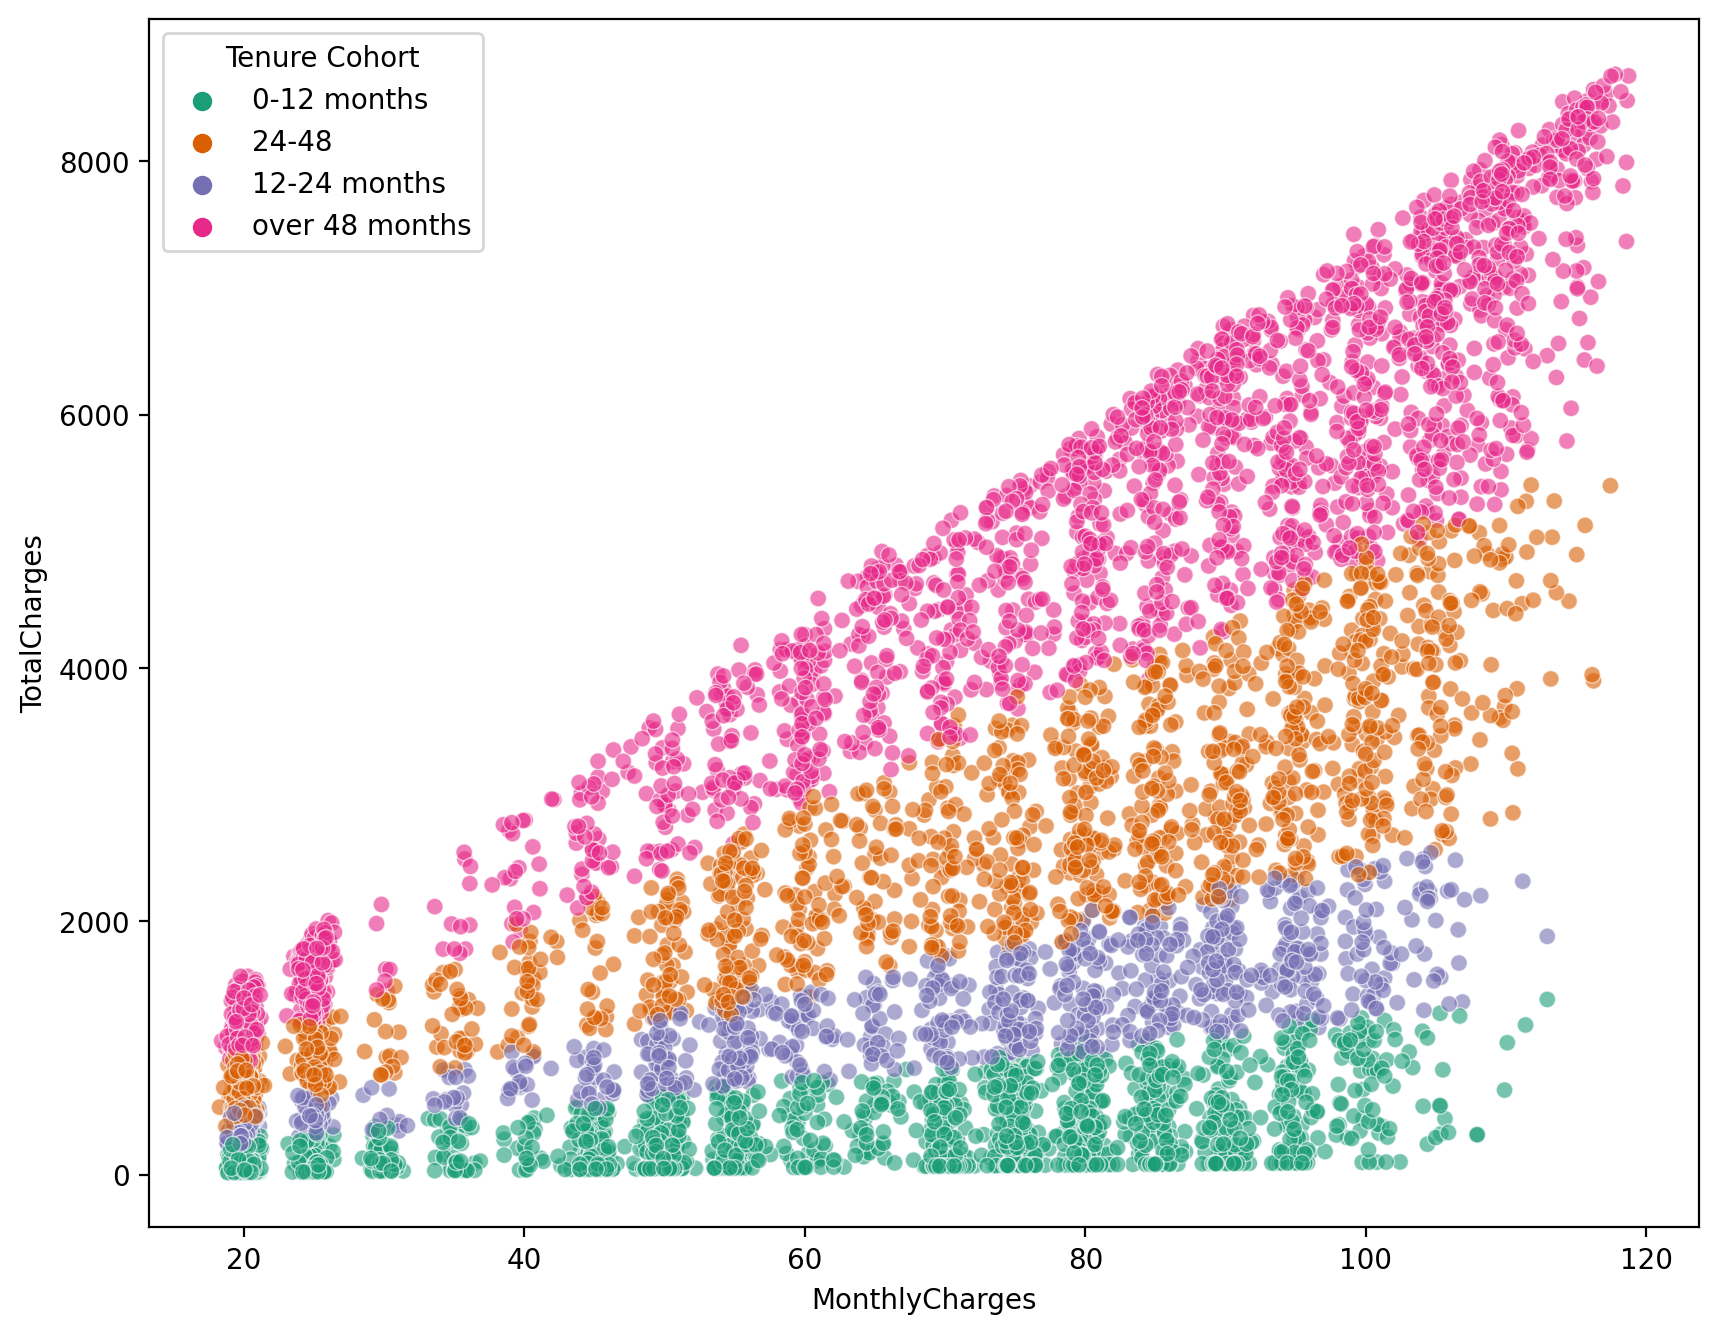

In [26]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.6,palette='Dark2')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

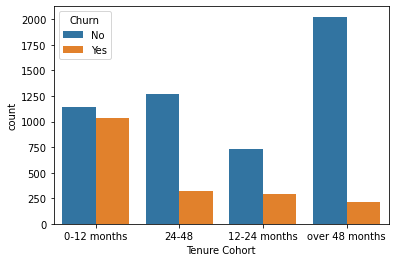

In [27]:
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

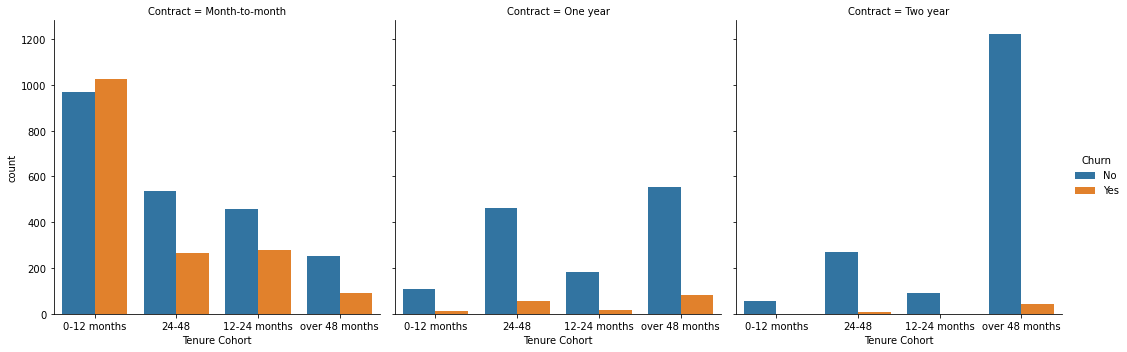

In [28]:
sns.catplot(data=df,x='Tenure Cohort', hue = 'Churn',kind='count',col='Contract')

# Modeling

In [29]:
X=df.drop(['Churn','customerID'],axis=1)
X= pd.get_dummies(X,drop_first=True)
y= df['Churn']

In [30]:
from sklearn.model_selection import train_test_split

In [133]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(max_depth=6)

In [34]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [35]:
preds = dt.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report

In [37]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86       511
         Yes       0.63      0.47      0.54       193

    accuracy                           0.78       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.77      0.78      0.77       704



C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


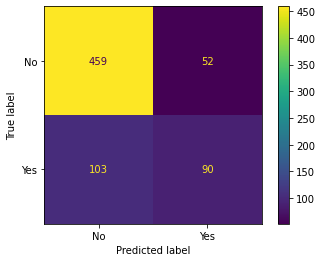

In [38]:
plot_confusion_matrix(dt,X_test,y_test)

In [39]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

In [40]:
imp_feats

Feature Importance
Tenure Cohort_over 48 months                     0.000000
Tenure Cohort_24-48                              0.000000
OnlineBackup_No internet service                 0.000000
StreamingTV_No internet service                  0.000000
OnlineSecurity_No internet service               0.000000
InternetService_No                               0.000000
StreamingTV_Yes                                  0.000000
TechSupport_No internet service                  0.000000
Partner_Yes                                      0.000000
PaymentMethod_Credit card (automatic)            0.000000
PaymentMethod_Mailed check                       0.000000
Tenure Cohort_12-24 months                       0.000000
MultipleLines_No phone service                   0.000916
Dependents_Yes                                   0.000955
DeviceProtection_Yes                             0.002578
gender_Male                                      0.003685
OnlineBackup_Yes                                 0.003860
StreamingMovies_Yes                              0.005545
MultipleLines_Yes                                0.005670
SeniorCitizen                                    0.005821
PhoneService_Yes                                 0.005841
TechSupport_Yes                                  0.009330
OnlineSecurity_Yes                               0.009679
PaperlessBilling_Yes                             0.011691
DeviceProtection_No internet service             0.013298
Contract_Two year                                0.017954
PaymentMethod_Electronic check                   0.020056
StreamingMovies_No internet service              0.021255
Contract_One year                                0.032356
MonthlyCharges                                   0.035796
TotalCharges                                     0.045288
InternetService_Fiber optic                      0.321707
tenure                                           0.426719

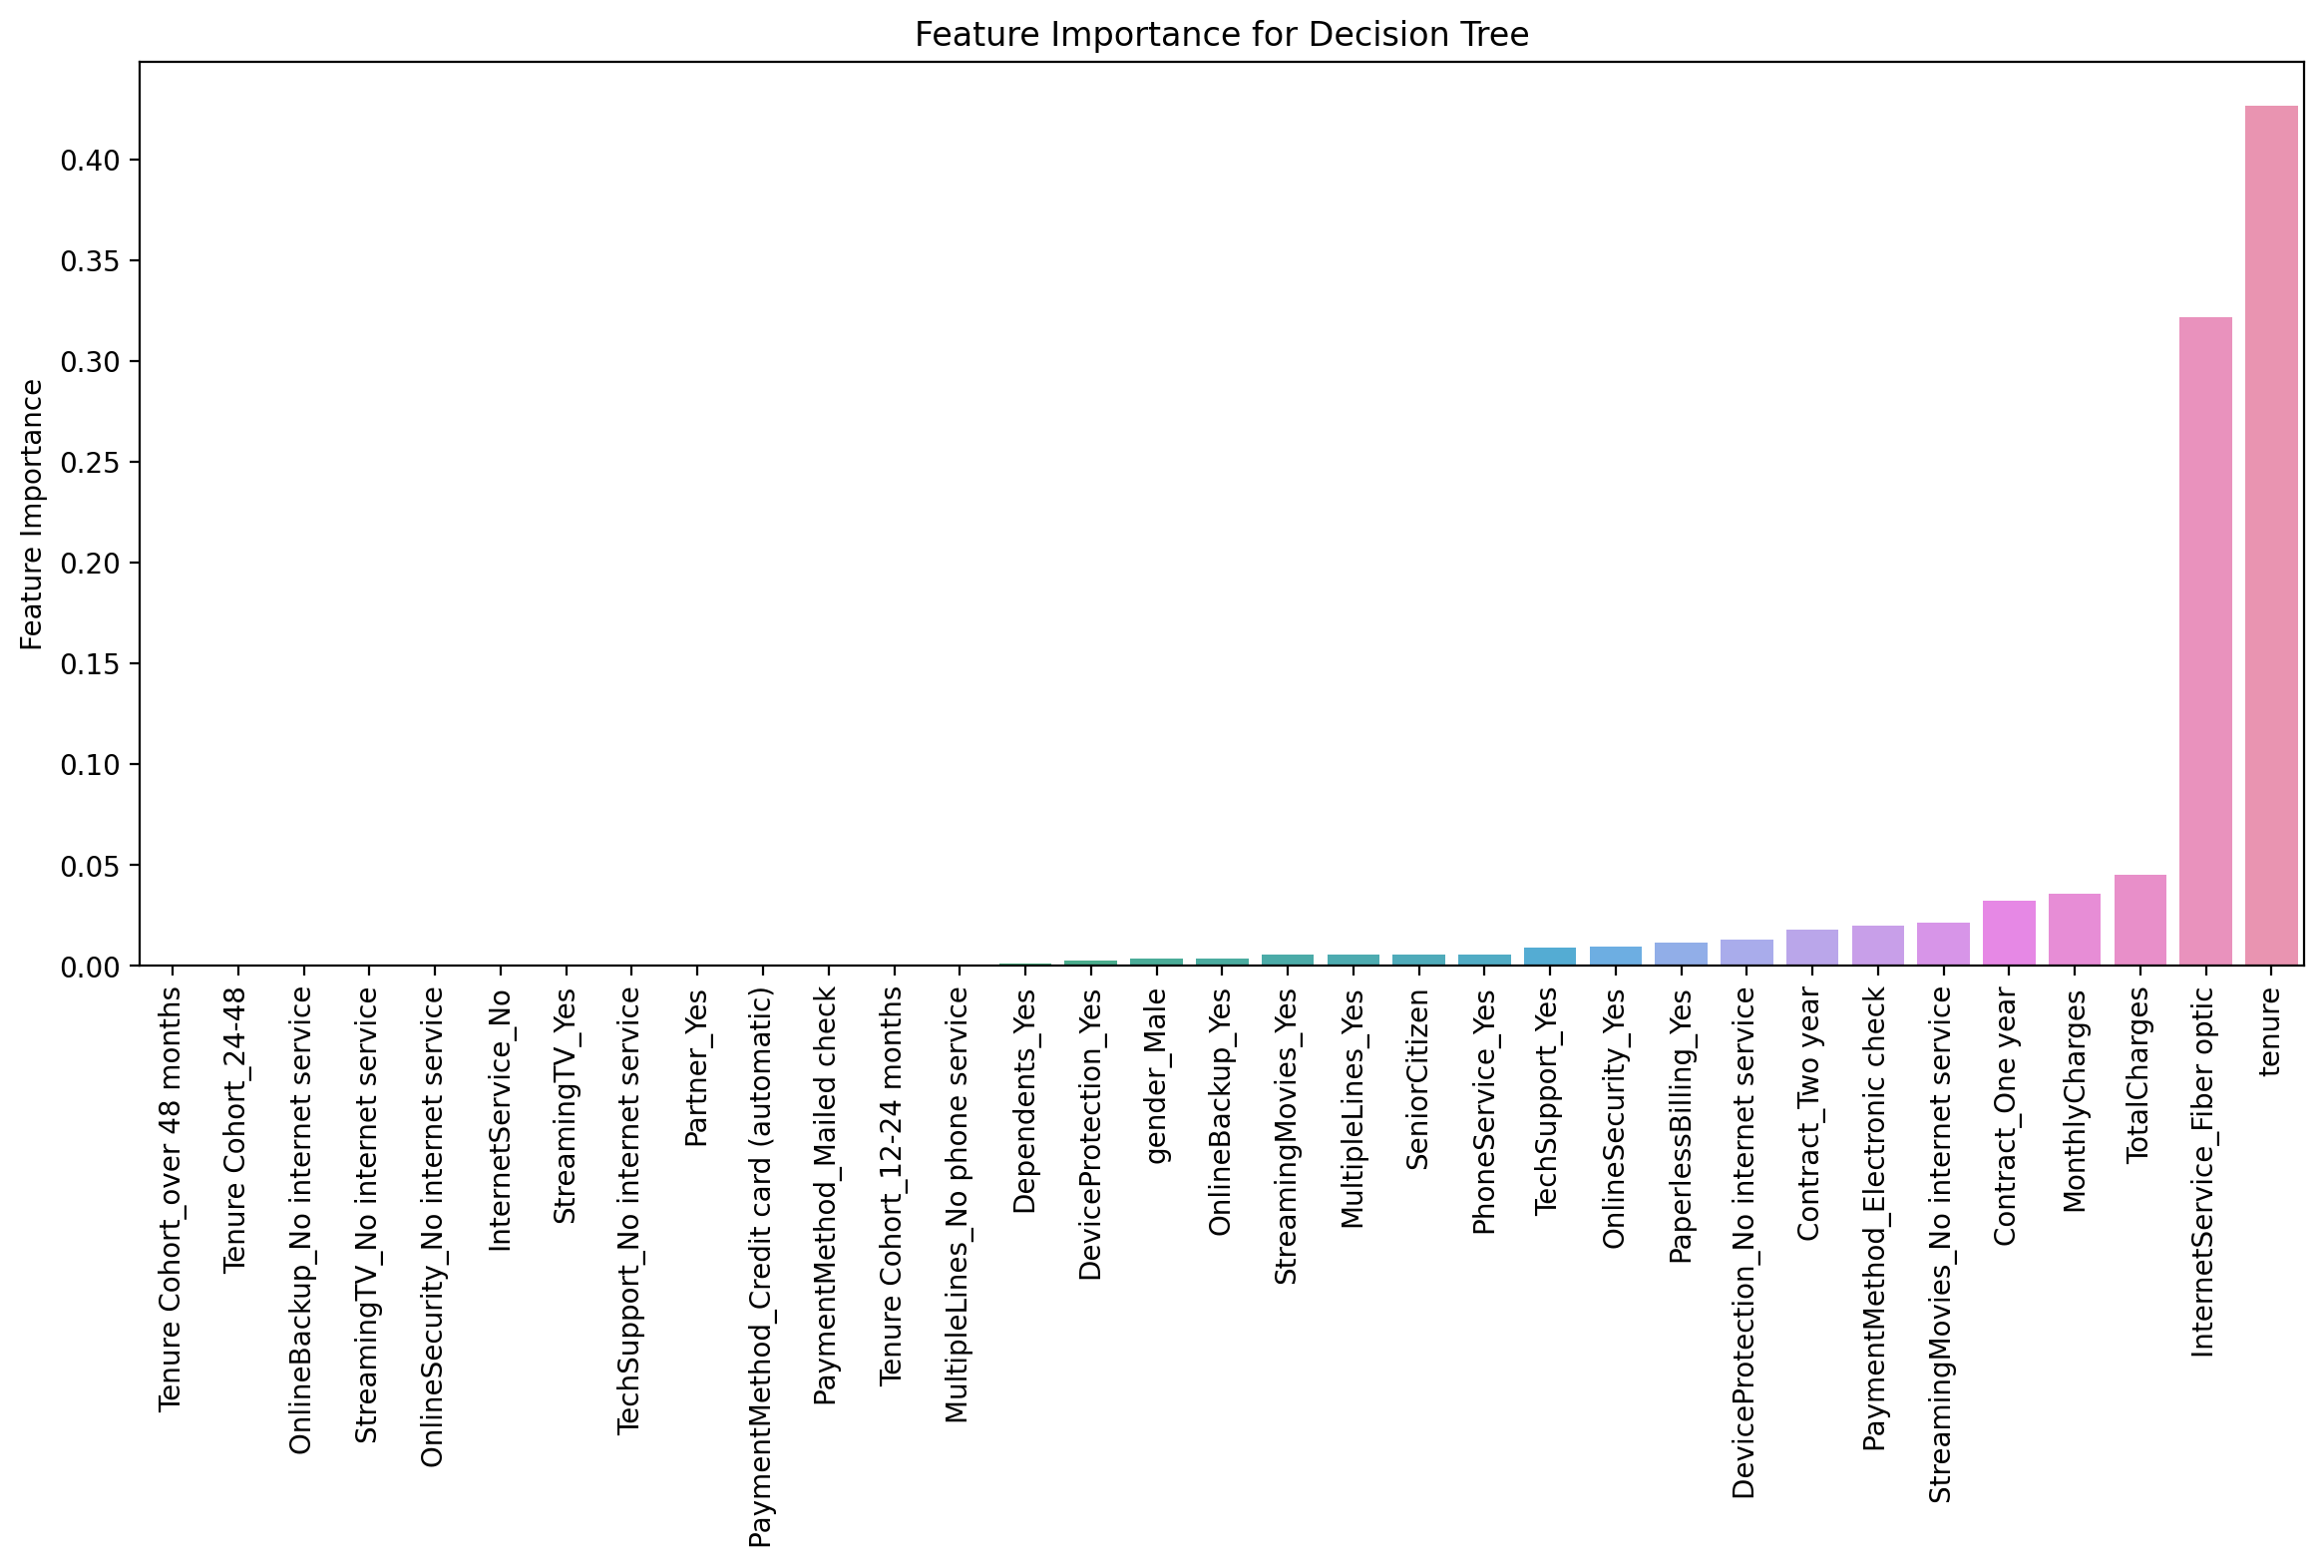

In [41]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

### Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=100)

In [44]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
preds = rf.predict(X_test)

In [46]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.81      0.90      0.85       511
         Yes       0.63      0.45      0.52       193

    accuracy                           0.78       704
   macro avg       0.72      0.67      0.69       704
weighted avg       0.76      0.78      0.76       704



C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


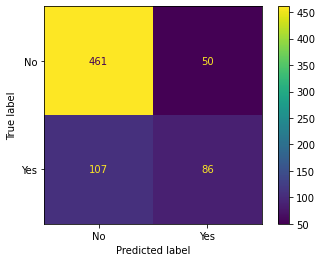

In [47]:
plot_confusion_matrix(rf,X_test,y_test)

### Boosted Trees

In [48]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [49]:
ada_model = AdaBoostClassifier()

In [50]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [51]:
preds = ada_model.predict(X_test)

In [52]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86       511
         Yes       0.66      0.51      0.58       193

    accuracy                           0.79       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.78      0.79      0.79       704



In [53]:
gb = GradientBoostingClassifier()

In [54]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [55]:
preds = gb.predict(X_test)

In [56]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86       511
         Yes       0.66      0.48      0.56       193

    accuracy                           0.79       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.78      0.79      0.78       704



*  now i will select the important features and tune the hyperparameter

In [57]:
imp_feats[imp_feats > 0].index

Index(['Tenure Cohort_over 48 months', 'Tenure Cohort_24-48',
       'OnlineBackup_No internet service', 'StreamingTV_No internet service',
       'OnlineSecurity_No internet service', 'InternetService_No',
       'StreamingTV_Yes', 'TechSupport_No internet service', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'Tenure Cohort_12-24 months', 'MultipleLines_No phone service',
       'Dependents_Yes', 'DeviceProtection_Yes', 'gender_Male',
       'OnlineBackup_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes',
       'SeniorCitizen', 'PhoneService_Yes', 'TechSupport_Yes',
       'OnlineSecurity_Yes', 'PaperlessBilling_Yes',
       'DeviceProtection_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'StreamingMovies_No internet service',
       'Contract_One year', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'tenure'],
      dtype='object')

In [58]:
imp_feats

Feature Importance
Tenure Cohort_over 48 months                     0.000000
Tenure Cohort_24-48                              0.000000
OnlineBackup_No internet service                 0.000000
StreamingTV_No internet service                  0.000000
OnlineSecurity_No internet service               0.000000
InternetService_No                               0.000000
StreamingTV_Yes                                  0.000000
TechSupport_No internet service                  0.000000
Partner_Yes                                      0.000000
PaymentMethod_Credit card (automatic)            0.000000
PaymentMethod_Mailed check                       0.000000
Tenure Cohort_12-24 months                       0.000000
MultipleLines_No phone service                   0.000916
Dependents_Yes                                   0.000955
DeviceProtection_Yes                             0.002578
gender_Male                                      0.003685
OnlineBackup_Yes                                 0.003860
StreamingMovies_Yes                              0.005545
MultipleLines_Yes                                0.005670
SeniorCitizen                                    0.005821
PhoneService_Yes                                 0.005841
TechSupport_Yes                                  0.009330
OnlineSecurity_Yes                               0.009679
PaperlessBilling_Yes                             0.011691
DeviceProtection_No internet service             0.013298
Contract_Two year                                0.017954
PaymentMethod_Electronic check                   0.020056
StreamingMovies_No internet service              0.021255
Contract_One year                                0.032356
MonthlyCharges                                   0.035796
TotalCharges                                     0.045288
InternetService_Fiber optic                      0.321707
tenure                                           0.426719

In [122]:
data = pd.read_csv('../DATA/Telco-Customer-Churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [200]:
data['Tenure Cohort']=data['tenure'].apply(cohort)

In [124]:
data[['Tenure Cohort','tenure']]

Tenure Cohort  tenure
0        0-12 months       1
1              24-48      34
2        0-12 months       2
3              24-48      45
4        0-12 months       2
...              ...     ...
7027    12-24 months      24
7028  over 48 months      72
7029     0-12 months      11
7030     0-12 months       4
7031  over 48 months      66

[7032 rows x 2 columns]

In [201]:
X = data.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Churn']

In [63]:
X.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85            0   
1              0      34           56.95       1889.50            1   
2              0       2           53.85        108.15            1   
3              0      45           42.30       1840.75            1   
4              0       2           70.70        151.65            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                               1                  0  ...   
1                               0                  0  ...   
2                               0                  0  ...   
3                               1                  0  ...   
4                               0                  0  ...   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                    0                  0                  0   
1                    0                  1                  0   
2                    0                  0                  0   
3                    0                  1                  0   
4                    0                  0                  0   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                     1                                      0   
1                     0                                      0   
2                     1                                      0   
3                     0                                      0   
4                     1                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                               1                           0   
1                               0                           1   
2                               0                           1   
3                               0                           0   
4                               1                           0   

   Tenure Cohort_12-24 months  Tenure Cohort_24-48  \
0                           0                    0   
1                           0                    1   
2                           0                    0   
3                           0                    1   
4                           0                    0   

   Tenure Cohort_over 48 months  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 33 columns]

In [202]:
X = X.drop(['Tenure Cohort_over 48 months', 'Tenure Cohort_24-48',
       'OnlineBackup_No internet service', 'StreamingTV_No internet service',
       'OnlineSecurity_No internet service', 'InternetService_No',
       'StreamingTV_Yes', 'TechSupport_No internet service', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'Tenure Cohort_12-24 months', 'MultipleLines_No phone service',
       'Dependents_Yes', 'DeviceProtection_Yes', 'gender_Male',
       'OnlineBackup_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes',
       'SeniorCitizen', 'PhoneService_Yes', 'TechSupport_Yes',
       'OnlineSecurity_Yes', 'PaperlessBilling_Yes'],axis=1)

In [127]:
X.head()

tenure  MonthlyCharges  TotalCharges  InternetService_Fiber optic  \
0       1           29.85         29.85                            0   
1      34           56.95       1889.50                            0   
2       2           53.85        108.15                            0   
3      45           42.30       1840.75                            0   
4       2           70.70        151.65                            1   

   DeviceProtection_No internet service  StreamingMovies_No internet service  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   Contract_One year  Contract_Two year  PaymentMethod_Electronic check  
0                  0                  0                               1  
1                  1                  0                               0  
2                  0                  0                               0  
3                  1                  0                               0  
4                  0                  0                               1

In [66]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

## Using GridSearch to tune hyperparameter

In [67]:
from sklearn.model_selection import GridSearchCV

In [142]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [69]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [70]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [71]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [72]:
grid.fit(X_train,y_train)

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.wa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [73]:
grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 64, 'oob_score': True}

In [74]:
preds = grid.predict(X_test)

In [75]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1033
         Yes       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



## Using deep learning

In [76]:
import tensorflow as tf

In [81]:
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), 
                metrics=["accuracy"])


model.fit(X_train,y_train,epochs = 20)



C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
176/176 [==============================] - 9s 2ms/step - loss: 2.7754 - accuracy: 0.6841
Epoch 2/20
176/176 [==============================] - 4s 20ms/step - loss: 0.5914 - accuracy: 0.7364
Epoch 3/20
176/176 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7406
Epoch 4/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7838
Epoch 5/20
176/176 [==============================] - 4s 20ms/step - loss: 0.4925 - accuracy: 0.7799
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7664
Epoch 7/20
176/176 [==============================] - 4s 21ms/step - loss: 0.4652 - accuracy: 0.7877
Epoch 8/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7879
Epoch 9/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7883
Epoch 10/20
176/176 [==============================] - 4s 20ms/step - loss: 0.4707 - accuracy: 0.

In [88]:
tf.random.set_seed(42)



model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(loss = 'binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.02),
               metrics=['accuracy'])

model_1.fit(X_train,y_train, epochs = 50)

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 7.0494 - accuracy: 0.7099
Epoch 2/50
176/176 [==============================] - 4s 20ms/step - loss: 2.0831 - accuracy: 0.7339
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 1.5837 - accuracy: 0.7349
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.9117 - accuracy: 0.7426
Epoch 5/50
176/176 [==============================] - 3s 20ms/step - loss: 1.0100 - accuracy: 0.7401
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7628
Epoch 7/50
176/176 [==============================] - 4s 20ms/step - loss: 0.5843 - accuracy: 0.7650
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7700
Epoch 9/50
176/176 [==============================] - 3s 20ms/step - loss: 0.5974 - accuracy: 0.7735
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.

In [85]:
model.evaluate(X_test,y_test)


44/44 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7861


[0.46750977635383606, 0.7860696315765381]

In [89]:
model_1.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7832


[0.47223177552223206, 0.783226728439331]

In [96]:
tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.02),
               metrics=['accuracy'])

model_2.fit(X_train,y_train, epochs = 50)

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 7.5122 - accuracy: 0.7036
Epoch 2/50
176/176 [==============================] - 3s 20ms/step - loss: 1.3873 - accuracy: 0.7353
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7605
Epoch 4/50
176/176 [==============================] - 3s 19ms/step - loss: 0.5234 - accuracy: 0.7742
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7813
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7840
Epoch 7/50
176/176 [==============================] - 3s 20ms/step - loss: 0.4595 - accuracy: 0.7865
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7877
Epoch 9/50
176/176 [==============================] - 3s 20ms/step - loss: 0.4572 - accuracy: 0.7899
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.

In [97]:
model_2.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7825


[0.479948490858078, 0.7825160026550293]

In [98]:
X.head()

tenure  MonthlyCharges  TotalCharges  InternetService_Fiber optic  \
0       1           29.85         29.85                            0   
1      34           56.95       1889.50                            0   
2       2           53.85        108.15                            0   
3      45           42.30       1840.75                            0   
4       2           70.70        151.65                            1   

   OnlineSecurity_Yes  DeviceProtection_No internet service  TechSupport_Yes  \
0                   0                                     0                0   
1                   1                                     0                0   
2                   1                                     0                0   
3                   1                                     0                1   
4                   0                                     0                0   

   StreamingMovies_No internet service  Contract_One year  Contract_Two year  \
0                                    0                  0                  0   
1                                    0                  1                  0   
2                                    0                  0                  0   
3                                    0                  1                  0   
4                                    0                  0                  0   

   PaperlessBilling_Yes  PaymentMethod_Electronic check  
0                     1                               1  
1                     0                               0  
2                     1                               0  
3                     0                               0  
4                     1                               1

In [99]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

## trying random forest again with reduced features

In [100]:
grid.fit(X_train,y_train)

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\model_selec

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [101]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 100, 'oob_score': False}

In [102]:
preds = grid.predict(X_test)

In [103]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [117]:
gb = GradientBoostingClassifier()

In [ ]:
n_estimators=[64,100,128,200]
learning_rate = [0.02,0.05,0.1,0.2]
max_depth= [2,3,4,5,6,7]
max_features = [2,3,4,5]
C = [0.1,0.2,0.3,0.5,0.8,0.99]
kernel = ['rbf','sigmoid']
degree = [1,2,3,4,5]


In [164]:
param_grid = {'n_estimators':n_estimators,
             'learning_rate':learning_rate,
             'max_depth':max_depth,
             'max_features':max_features}

In [165]:
grid = GridSearchCV(estimator=gb,param_grid=param_grid)

In [166]:
#grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [131]:
preds = grid.predict(X_test)

In [132]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1033
         Yes       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [143]:
gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=4,max_features=3,n_estimators=64)

In [144]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features=3, n_estimators=64)

In [145]:
preds=gb.predict(X_test)

In [146]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1329
         Yes       0.63      0.52      0.57       429

    accuracy                           0.81      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



In [147]:
len(X.columns)

9

In [148]:
len(data.columns)

22

* even though my machine learning model didnt improve much, i was able to reduce the demension from 22 features to 9

In [149]:
from sklearn.svm import SVC

In [150]:
sv = SVC()

In [151]:
sv.fit(X_train,y_train)

SVC()

In [152]:
sv.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [153]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1329
         Yes       0.63      0.52      0.57       429

    accuracy                           0.81      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



              precision    recall  f1-score   support

          No       0.76      1.00      0.86      1329
         Yes       0.00      0.00      0.00       429

    accuracy                           0.76      1758
   macro avg       0.38      0.50      0.43      1758
weighted avg       0.57      0.76      0.65      1758



C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashut\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
